In [1]:
# Leticia Mara Berto                212069
# Thales Mateus Rodrigues Oliveira  148051

In [2]:
#%tensorflow_version 1.x #Usando o Google Collab, que por default tem o Tensorflow 2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#função f
def f(x):
  return 100*((x[1] - (x[0]**2))**2) + (1-x[0])**2 + 100*((x[2] - (x[1]**2))**2) + (1 - x[1])**2

In [4]:
#gradiente de f = derivada de f
#a derivada parcial de f em relaco a x1, em relacao a x2 e em relacao a x3. Nao ha uma "derivada da funcao"- ha 3 derivadas parciais 
def grad(x):
  gradiente = np.zeros(3)
  gradiente[0] = -400*x[1]*x[0] + 400*(x[0]**3) - 2 + 2*x[0] 
  gradiente[1] = 202*x[1] - 200*(x[0]**2) - 400*x[2]*x[1] + 400*(x[1]**3) - 2
  gradiente[2] = 200*x[2] - 200*(x[1]**2)
  return gradiente

In [5]:
#tolerancia
def tol(xn, xv):
  return np.linalg.norm(xn-xv)/np.linalg.norm(xv)

In [6]:
#Descida do gradiente com gradiente explicito
def descGrad(tolAllowed, maxSteps, lrs, useTol):
  fig, ax = plt.subplots(figsize=(8, 8))
  for i in range(len(lrs)):
    countSteps = 0 
    tolerancia = 10 
    fValues = []
    steps = []
    x = np.array([0.0, 0.0, 0.0]) #Ponto inicial 
    fValues.append(f(x)) 
    steps.append(countSteps)
    j = False
    while countSteps < maxSteps:
      if(useTol):#em alguns testes não iremos parar usando a tolerancia, somente o numero de passos
        if (tolerancia < tolAllowed):
          break;
      xn = x - lrs[i]*grad(x) #Calcula o proximo ponto
      if (j == True):#ignorar o primeiro teste de convergencia, pois senao da erro ao dividir por zero
        tolerancia = tol(xn, x)
      j = True
      x = xn #Atualiza o x depois de andar no plano
      countSteps += 1 #conta o numero de passos, logo o numero de vezes que X foi atualizado tbm
      fValues.append(f(x)) 
      steps.append(countSteps)
    ax.scatter(steps, fValues, label = 'learning rate ' + str(lrs[i]))
    print("Learning rate: "+ str(lrs[i]))
    print("Qntd de atulizações de x: ", countSteps)
    
    if(useTol):
        print("Tolerancia Final: ", tolerancia)
        
    print("Final f(x) = ", f(x))
    print("---------------------------------------------")


  ax.legend(loc='best')
  plt.xlabel("Atualização de x (steps)")
  plt.ylabel("f(x)")
  plt.title("MaxSteps: " + str(maxSteps) + " -- Tolerance " + str(tolAllowed) + " -- ConsiderTolerance: " + str(useTol))
  plt.show()

Learning rate: 0.0001
Qntd de atulizações de x:  5893
Tolerancia Final:  9.999953118552611e-05
Final f(x) =  0.33871476580781956
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  2491
Tolerancia Final:  9.995841396035966e-05
Final f(x) =  0.019028769821433048
---------------------------------------------


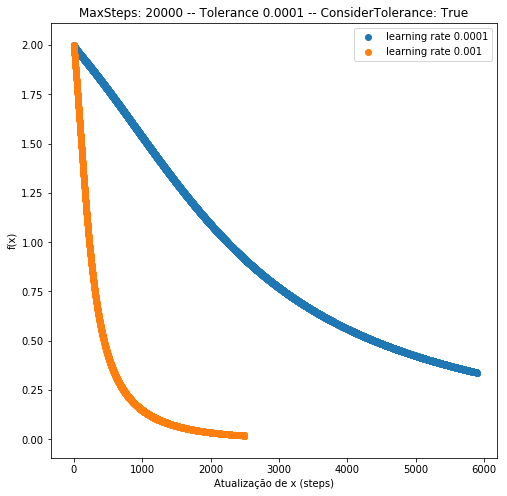

In [7]:
##### Usando como parada a tolerancia (1.0e-4) E o numero de passos(20k)  #####
descGrad(1.0e-4, 20000, lrs = [1.0e-4, 1.0e-3], useTol = True)

Learning rate: 0.0001
Qntd de atulizações de x:  20000
Final f(x) =  0.03464129570557583
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  20000
Final f(x) =  7.559423872955021e-10
---------------------------------------------


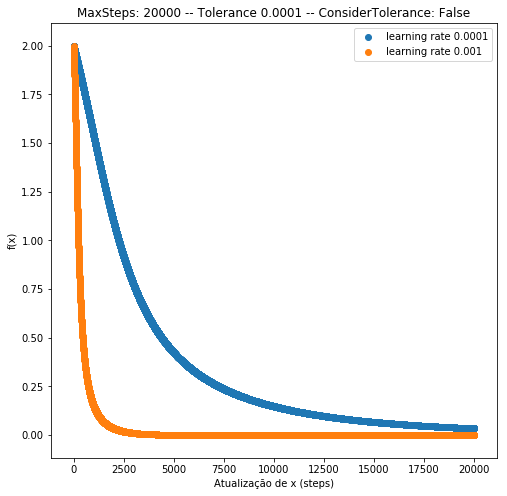

In [8]:
##### Usando como parada somente numero de passos(20k)  #####
descGrad(1.0e-4, 20000, lrs = [1.0e-4, 1.0e-3], useTol = False)

Learning rate: 0.0001
Qntd de atulizações de x:  40000
Final f(x) =  0.003645513053331692
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  40000
Final f(x) =  4.1840218213479715e-18
---------------------------------------------


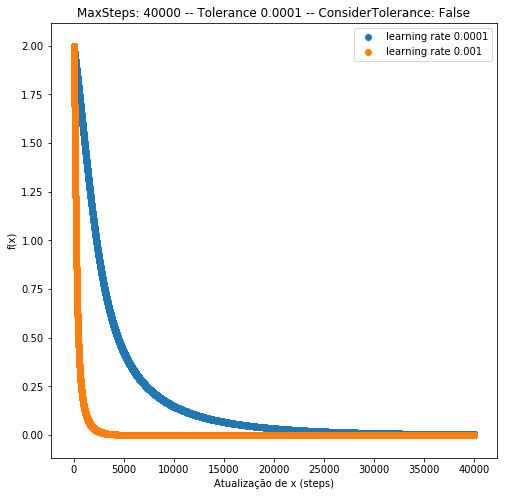

In [9]:
##### Usando como parada somente numero de passos(40k)  #####
descGrad(1.0e-4, 40000, lrs = [1.0e-4, 1.0e-3], useTol = False)

Learning rate: 0.0001
Qntd de atulizações de x:  20000
Tolerancia Final:  1.4749301524796248e-05
Final f(x) =  0.03464129570557583
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  6506
Tolerancia Final:  9.99638517931272e-06
Final f(x) =  0.0002962239865382496
---------------------------------------------


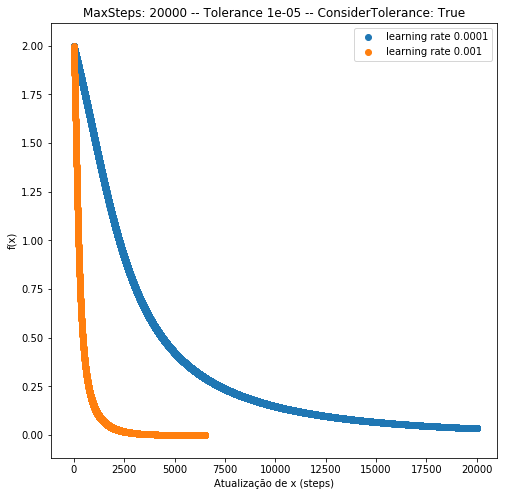

In [10]:
##### Usando como parada a tolerancia(1.0e-5) E o numero de passos(20k) #####
descGrad(1.0e-5, 20000, lrs = [1.0e-4, 1.0e-3], useTol = True)

Learning rate: 0.0001
Qntd de atulizações de x:  20000
Final f(x) =  0.03464129570557583
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  20000
Final f(x) =  7.559423872955021e-10
---------------------------------------------


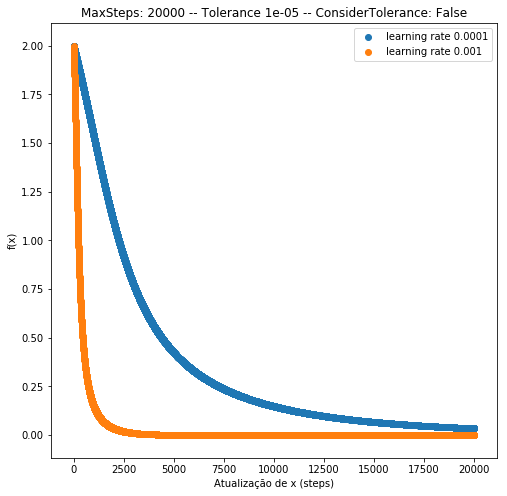

In [11]:
##### Usando como parada somente numero de passos(20k)  #####
descGrad(1.0e-5, 20000, lrs = [1.0e-4, 1.0e-3], useTol = False)

Learning rate: 0.0001
Qntd de atulizações de x:  40000
Final f(x) =  0.003645513053331692
---------------------------------------------
Learning rate: 0.001
Qntd de atulizações de x:  40000
Final f(x) =  4.1840218213479715e-18
---------------------------------------------


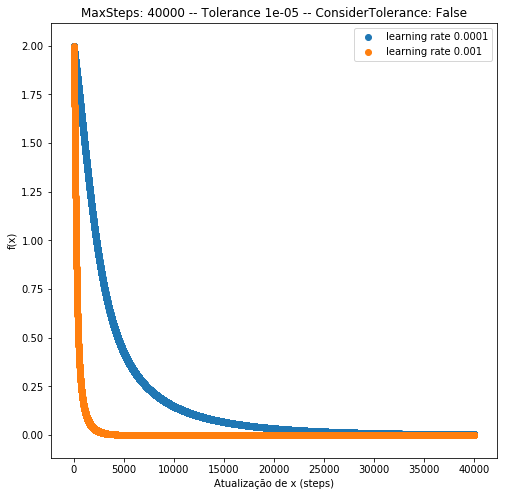

In [12]:
##### Usando como parada somente numero de passos(40k)  #####
descGrad(1.0e-5, 40000, lrs = [1.0e-4, 1.0e-3], useTol = False)

Learning rate: 0.0015
Qntd de atulizações de x:  2051
Tolerancia Final:  9.995802522577188e-05
Final f(x) =  0.00976932823562356
---------------------------------------------
Learning rate: 0.0016
Qntd de atulizações de x:  1985
Tolerancia Final:  9.996146371938544e-05
Final f(x) =  0.008754367771180044
---------------------------------------------
Learning rate: 0.002
Qntd de atulizações de x:  20000
Tolerancia Final:  0.05414398071424265
Final f(x) =  0.6552479387990635
---------------------------------------------


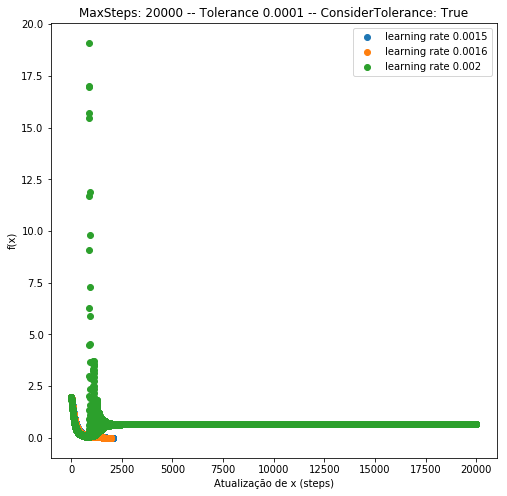

In [13]:
# Usando Learning rates maiores para mostrar comportamento

##### Usando como parada a tolerancia(1.0e-4) E o numero de passos(20k) #####
descGrad(1.0e-4, 20000, lrs = [1.5e-3, 1.6e-3, 2.0e-3], useTol = True)

Learning rate: 0.0015
Qntd de atulizações de x:  20000
Final f(x) =  0.09704452101960905
---------------------------------------------
Learning rate: 0.0016
Qntd de atulizações de x:  20000
Final f(x) =  0.22327175157309892
---------------------------------------------
Learning rate: 0.002
Qntd de atulizações de x:  20000
Final f(x) =  0.6552479387990635
---------------------------------------------


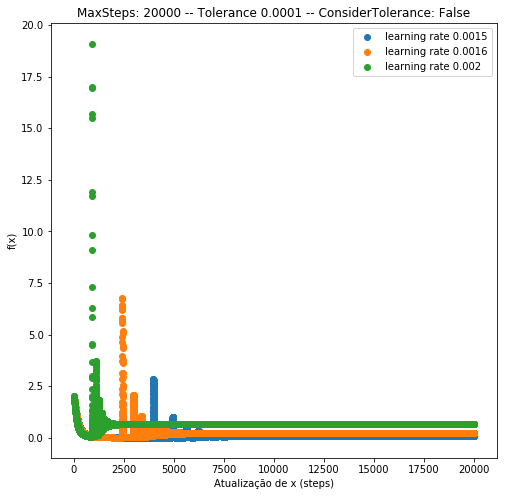

In [14]:
# Usando Learning rates maiores para mostrar comportamento

##### Usando como parada somente numero de passos(20k)  #####
descGrad(1.0e-4, 20000, lrs = [1.5e-3, 1.6e-3, 2.0e-3], useTol = False)

Learning rate: 0.0015
Qntd de atulizações de x:  20000
Tolerancia Final:  0.014453458812014262
Final f(x) =  0.09704452101960905
---------------------------------------------
Learning rate: 0.0016
Qntd de atulizações de x:  20000
Tolerancia Final:  0.023790291024763415
Final f(x) =  0.22327175157309892
---------------------------------------------
Learning rate: 0.002
Qntd de atulizações de x:  20000
Tolerancia Final:  0.05414398071424265
Final f(x) =  0.6552479387990635
---------------------------------------------


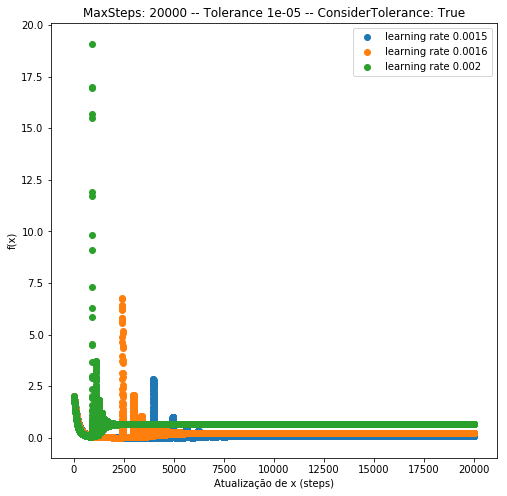

In [15]:
##### Usando como parada a tolerancia(1.0e-5) E o numero de passos(20k) #####
descGrad(1.0e-5, 20000, lrs = [1.5e-3, 1.6e-3, 2.0e-3], useTol = True)

Learning rate: 0.0015
Qntd de atulizações de x:  514
Tolerancia Final:  0.000997820753119478
Final f(x) =  0.22712139980900328
---------------------------------------------
Learning rate: 0.0016
Qntd de atulizações de x:  503
Tolerancia Final:  0.0009970463972128717
Final f(x) =  0.21224143573332657
---------------------------------------------
Learning rate: 0.002
Qntd de atulizações de x:  465
Tolerancia Final:  0.000999688193047991
Final f(x) =  0.1673515294535725
---------------------------------------------


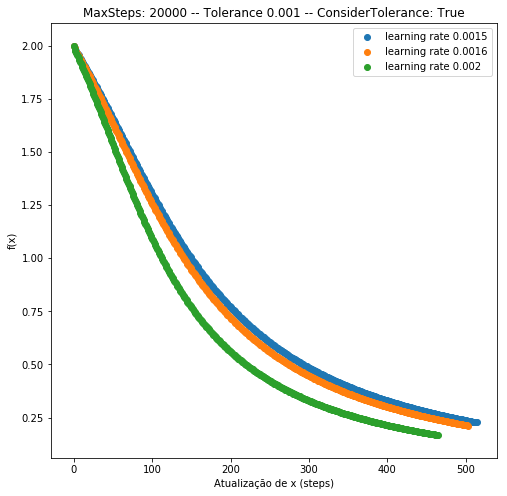

In [16]:
##### Usando como parada a tolerancia(1.0e-3) E o numero de passos(20k) #####
descGrad(1.0e-3, 20000, lrs = [1.5e-3, 1.6e-3, 2.0e-3], useTol = True)

/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/leticia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/leticia/.local/lib

Learning rate: 0.2
Qntd de atulizações de x:  20000
Tolerancia Final:  nan
Final f(x) =  nan
---------------------------------------------


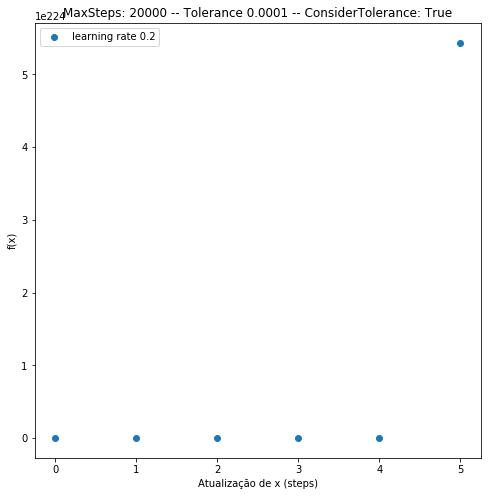

In [17]:
##### Usando como parada a tolerancia(1.0e-4) E o numero de passos(20k) #####
descGrad(1.0e-4, 20000, lrs = [2.0e-1], useTol = True) #não funciona, pois o LR é muito grande (comportamento esperado mesmo)

In [18]:
# Usando tensorflow para calcular o gradiente

# descida do gradiente do próprio TensorFlow = tf.train.GradientDescentOptimizer

x1 = tf.Variable(0, name='x1', dtype=tf.float32)
x2 = tf.Variable(0, name='x2', dtype=tf.float32)
x3 = tf.Variable(0, name='x3', dtype=tf.float32)

# escrevendo a função desta forma comentada a baixo, gera o mesmo resultado que escrever utilizando puramente a sintaxe do tensorflow
# manteremos descomentado a lógica utilizando a sintaxe do tensorflow
# f = (100*tf.square(x2 - tf.square(x1))) + (tf.square(1 - x1)) + (100*tf.square(x3 - tf.square(x2))) + tf.square(1 - x2)

one = tf.constant(1, name="one", dtype=tf.float32)
hundred = tf.constant(100, name="hundred", dtype=tf.float32)
f = tf.add(tf.add(tf.add(tf.multiply(hundred, tf.square(tf.subtract(x2, tf.square(x1)))), tf.square(tf.subtract(one, x1))), tf.multiply(hundred, tf.square(tf.subtract(x3, tf.square(x2))))), tf.square(tf.subtract(one, x2)))

Learning rate: 0.0001
Qntd de atulizações de x:  5892
Tolerancia Final: 0.0001
Final f(x) =  0.33871529
---------------------------------------------


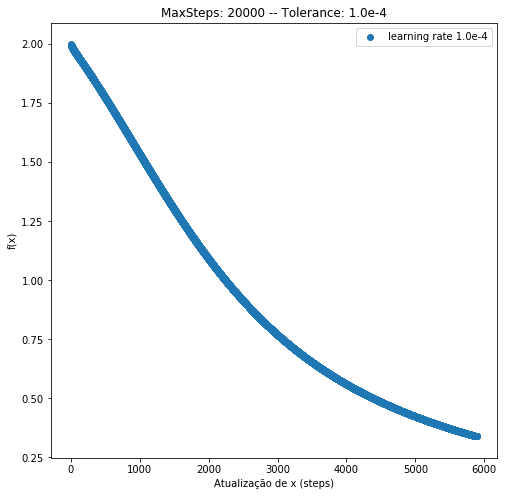

In [19]:
# Para o learning rate de 1.0e-4:
fig, ax = plt.subplots(figsize=(8, 8))
fvalues = []
steps = []

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.0e-4)
train = optimizer.minimize(f)

init = tf.global_variables_initializer()
sess = tf.Session() # para rodar a estrutura
sess.run(init)

# Considerando a tolerância:
old_values = np.array([10.0, 10.0, 10.0])
for step in range(20000):
  sess.run(train)
  most_recent = np.array([sess.run(x1), sess.run(x2), sess.run(x3)])
  diff = tol(most_recent, old_values)
  if diff < 1.0e-4:
    break
  old_values = most_recent
  fvalues.append(sess.run(f))
  steps.append(step)
  step += 1


print("Learning rate: "+ str(1.0e-4))
print("Qntd de atulizações de x: ", step)
print("Tolerancia Final: " + str(1.0e-4))
print("Final f(x) = ", sess.run(f))
print("---------------------------------------------")

ax.scatter(steps, fvalues, label = 'learning rate ' + '1.0e-4')
ax.legend(loc='best')
plt.xlabel("Atualização de x (steps)")
plt.ylabel("f(x)")
plt.title("MaxSteps: " + str(20000) + " -- Tolerance: 1.0e-4")
plt.show()

Learning rate: 0.0001
Qntd de atulizações de x:  20000
Final f(x) =  0.034654275
---------------------------------------------


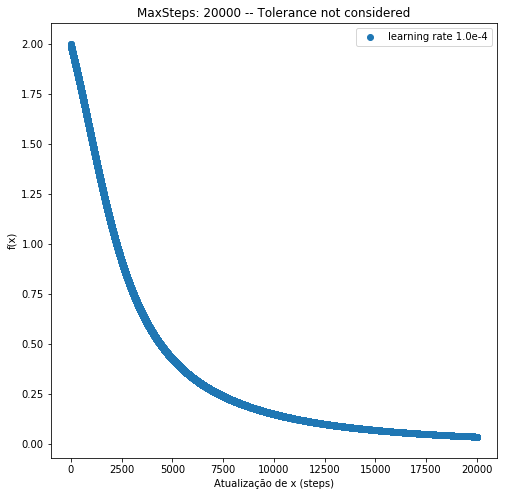

In [20]:
# Para o learning rate de 1.0e-4:
fig, ax = plt.subplots(figsize=(8, 8))
fvalues = []
steps = []

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.0e-4)
train = optimizer.minimize(f)

init = tf.global_variables_initializer()
sess = tf.Session() # para rodar a estrutura
sess.run(init)

# Desconsiderando a tolerância:
for step in range(20000):
  sess.run(train)
  fvalues.append(sess.run(f))
  steps.append(step)
  step += 1


print("Learning rate: "+ str(1.0e-4))
print("Qntd de atulizações de x: ", step)
print("Final f(x) = ", sess.run(f))
print("---------------------------------------------")

ax.scatter(steps, fvalues, label = 'learning rate ' + '1.0e-4')
ax.legend(loc='best')
plt.xlabel("Atualização de x (steps)")
plt.ylabel("f(x)")
plt.title("MaxSteps: " + str(20000) + " -- Tolerance not considered")
plt.show()

Learning rate: 0.001
Qntd de atulizações de x:  2490
Tolerancia Final: 0.0001
Final f(x) =  0.019028712
---------------------------------------------


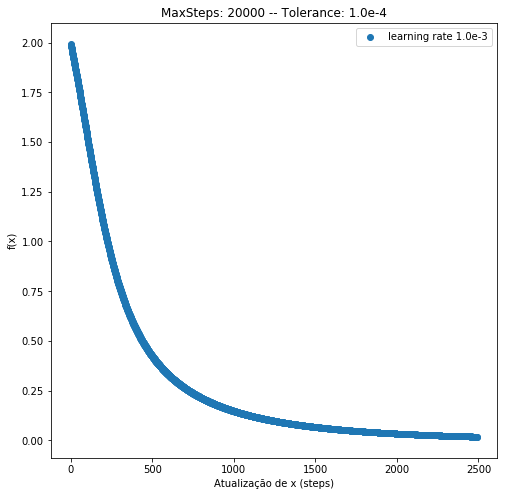

In [21]:
# Para o learning rate de 1.0e-3:
fig, ax = plt.subplots(figsize=(8, 8))
fvalues = []
steps = []

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.0e-3)
train = optimizer.minimize(f)

init = tf.global_variables_initializer()
sess = tf.Session() # para rodar a estrutura
sess.run(init)

# Considerando a tolerância:
old_values = np.array([10.0, 10.0, 10.0])
for step in range(20000):
  sess.run(train)
  most_recent = np.array([sess.run(x1), sess.run(x2), sess.run(x3)])
  diff = tol(most_recent, old_values)
  if diff < 1.0e-4:
    break
  old_values = most_recent
  fvalues.append(sess.run(f))
  steps.append(step)
  step += 1


print("Learning rate: "+ str(1.0e-3))
print("Qntd de atulizações de x: ", step)
print("Tolerancia Final: " + str(1.0e-4))
print("Final f(x) = ", sess.run(f))
print("---------------------------------------------")

ax.scatter(steps, fvalues, label = 'learning rate ' + '1.0e-3')
ax.legend(loc='best')
plt.xlabel("Atualização de x (steps)")
plt.ylabel("f(x)")
plt.title("MaxSteps: " + str(20000) + " -- Tolerance: 1.0e-4")
plt.show()

Learning rate: 0.001
Qntd de atulizações de x:  20000
Final f(x) =  1.3392913e-09
---------------------------------------------


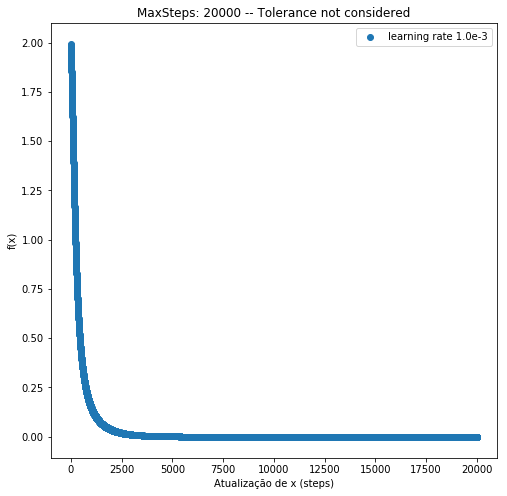

In [22]:
# Para o learning rate de 1.0e-3:
fig, ax = plt.subplots(figsize=(8, 8))
fvalues = []
steps = []

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.0e-3)
train = optimizer.minimize(f)

init = tf.global_variables_initializer()
sess = tf.Session() # para rodar a estrutura
sess.run(init)

# Desconsiderando a tolerância:
step = 0
for step in range(20000):
  sess.run(train)
  fvalues.append(sess.run(f))
  steps.append(step)
  step += 1

print("Learning rate: "+ str(1.0e-3))
print("Qntd de atulizações de x: ", step)
print("Final f(x) = ", sess.run(f))
print("---------------------------------------------")

ax.scatter(steps, fvalues, label = 'learning rate ' + '1.0e-3')
ax.legend(loc='best')
plt.xlabel("Atualização de x (steps)")
plt.ylabel("f(x)")
plt.title("MaxSteps: " + str(20000) + " -- Tolerance not considered")
plt.show()

sess.close()  